This Jupyter Notebook file serves the purpose of processing UV-vis data files, analyzing them for peaks and shifts, and creating figures to visualize results. 

Every instrument software outputs data in different formats, so the very first process is to figure that out and import it into the notebook correctly. 

The notebook can then normalize data sets to a specific peak, analyze specific peaks for position and relative height, and then make figures using datasets for comparison.

In [2]:
import os
import numpy as np
import pandas as pd
import scipy.interpolate
import matplotlib.pyplot as plt
print(os.listdir())
path = os.getcwd()
figurepath = path + '/figures'

['.ipynb_checkpoints', 'figures', 'IDTBT blends', 'IDTBT in Solution', 'UV-Vis analysis.ipynb']


In [2]:
'''
this module imports data from the RTT UV-vis, the software package is called: _______________
The data output should be comma-separated values (CSV), with two columns, one for nm, the other for AU
Store a dataset into a folder and chose that folder to import all of the data. 
The notebook will create a dataframe with the title of each data being the filename
'''

thefile = "IDTBT in Solution"
data=pd.read_csv(thefile, delimiter = "\t")

In [3]:
print('hello Chelan')

hello Chelan


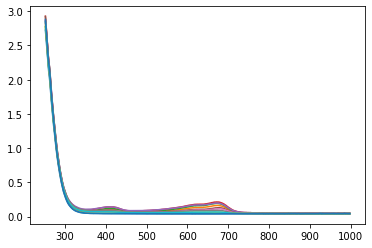

In [4]:
# this gives you an idea of your idea without any modification
plt.figure()
xval = data["nm"]
for sample in data.columns.values:
    if sample != 'nm':
        yval = data[sample]
        plt.plot(xval,yval)

In [5]:
#this here tells you the range of your data, you will get an error if you try to index too low or too high
start = 260
stop = 800
init = data[data['nm'] == start].index.values
finit = data[data['nm'] == stop].index.values
data['100'][init[0]:finit[0]]

8      2.222
9      2.177
10     2.122
11     2.059
12     1.981
       ...  
543    0.046
544    0.046
545    0.046
546    0.046
547    0.045
Name: 100, Length: 540, dtype: float64

In [6]:
data=pd.read_csv(thefile, delimiter = "\t")

# baseline subtraction
for sample in data.columns.values:
    if sample != 'nm' and sample != 'baseline':
        data[sample] = data[sample] - data["baseline"]
        
#data cutting
start = 260
stop = 900
init = data[data['nm'] == start].index.values
finit = data[data['nm'] == stop].index.values
data = data[init[0]:finit[0]]

#zero the baseline
for sample in data.columns.values:
    if sample != 'nm' and sample != 'baseline':
        data[sample] = data[sample]-min(data[sample])
newindex = start-data["nm"].first_valid_index()

#normalizing
#here, try to start and stop the range near the peak you want to normalize to.
start = 400
stop = 420
init = data[data['nm'] == start-data["nm"].first_valid_index()].index.values
finit = data[data['nm'] == stop-data["nm"].first_valid_index()].index.values
top = max(data['100'][init[0]:finit[0]])
toploc = data[data['100'] == top].index.values
for sample in data.columns.values:
    if sample != 'nm' and sample != 'baseline' and sample != '100' and sample != '0':
        ratio = top/data[sample][toploc].iloc[0]
        data[sample] = data[sample]*ratio

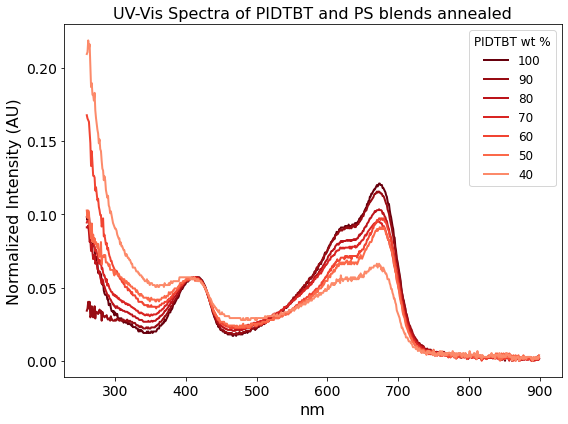

In [10]:
name_of_figure = 'UV-Vis Spectra of PIDTBT and PS blends annealed'
filename = figurepath + "/" + name_of_figure

samplelist = ['100','90','80','70','60', '50', '40']
color_idx = np.linspace(0, 0.6, len(samplelist))

plt.figure(figsize=(8,6))
xval = data["nm"]
for i, sample in zip(color_idx,samplelist):
    yval = data[sample]
    plt.plot(xval,yval, label = sample, color=plt.cm.Reds_r(i), lw =2)
    f = scipy.interpolate.interp1d(xval, yval, kind = 'quadratic')
    xnew = np.linspace(min(xval), max(xval), num=100, endpoint=True)
    ynew = f(xnew)
    #plt.plot(xnew,ynew, label = sample, color=plt.cm.Reds_r(i), lw =2)

plt.xlabel('nm', fontsize=16)
plt.ylabel('Normalized Intensity (AU)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12,loc='upper right',title='PIDTBT wt %' , title_fontsize=12)

plt.title(name_of_figure,fontsize=16)

#plt.ylim(0, 1)
#plt.xlim(-5, 55)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')

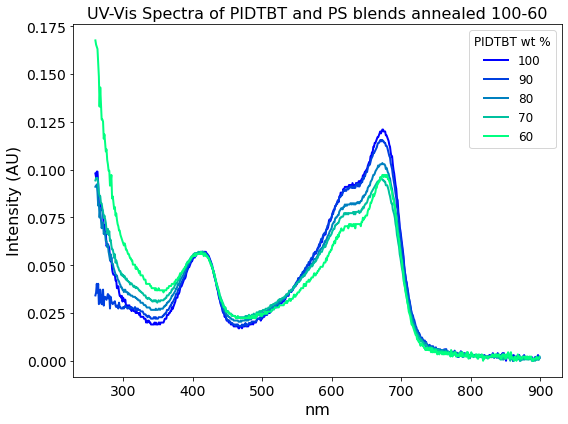

In [9]:
name_of_figure = 'UV-Vis Spectra of PIDTBT and PS blends annealed 100-60'
filename = figurepath + "/" + name_of_figure

samplelist = ['100','90','80','70','60']
#samplelist = ['50','40', '30', '20']
color_idx = np.linspace(0, 1, len(samplelist))

plt.figure(figsize=(8,6))
xval = data["nm"]
for i, sample in zip(color_idx,samplelist):
    yval = data[sample]
    plt.plot(xval,yval, label = sample, color=plt.cm.winter(i), lw =2)
    f = scipy.interpolate.interp1d(xval, yval, kind = 'quadratic')
    xnew = np.linspace(min(xval), max(xval), num=100, endpoint=True)
    ynew = f(xnew)
    #plt.plot(xnew,ynew, label = sample, color=plt.cm.winter(i), lw =2)

plt.xlabel('nm', fontsize=16)
plt.ylabel('Intensity (AU)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12,loc='upper right',title='PIDTBT wt %' , title_fontsize=12)

plt.title(name_of_figure,fontsize=16)

#plt.ylim(0, 1)
#plt.xlim(-5, 55)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')

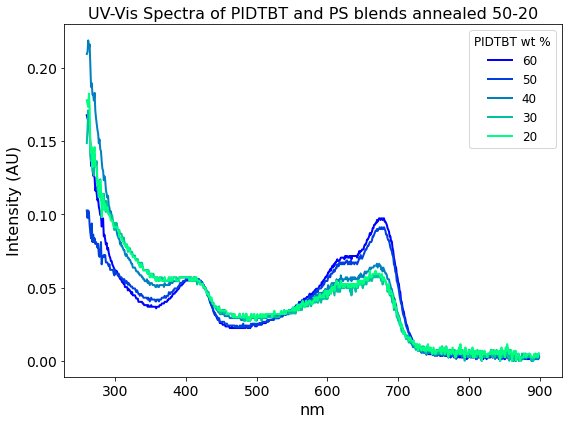

In [26]:
name_of_figure = 'UV-Vis Spectra of PIDTBT and PS blends annealed 50-20'
filename = figurepath + "/" + name_of_figure

samplelist = ['60','50','40','30','20']
#samplelist = ['50','40', '30', '20']
color_idx = np.linspace(0, 1, len(samplelist))

plt.figure(figsize=(8,6))
xval = data["nm"]
for i, sample in zip(color_idx,samplelist):
    yval = data[sample]
    plt.plot(xval,yval, label = sample, color=plt.cm.winter(i), lw =2)
    f = scipy.interpolate.interp1d(xval, yval, kind = 'quadratic')
    xnew = np.linspace(min(xval), max(xval), num=100, endpoint=True)
    ynew = f(xnew)
    #plt.plot(xnew,ynew, label = sample, color=plt.cm.winter(i), lw =2)

plt.xlabel('nm', fontsize=16)
plt.ylabel('Intensity (AU)', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12,loc='upper right',title='PIDTBT wt %' , title_fontsize=12)

plt.title(name_of_figure,fontsize=16)

#plt.ylim(0, 1)
#plt.xlim(-5, 55)

plt.tight_layout()
plt.savefig(filename, dpi=300, bbox_inches='tight')